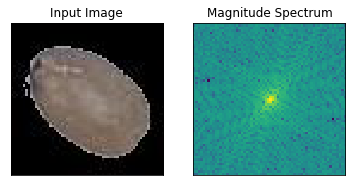

In [15]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
 
# img = cv2.imread('../data/insect_data/insect_sec_processed_data/20200520_3_insect_take0_final.jpg')
img = Image.open('../data/insect_data/insect_sec_processed_data/20200520_3_insect_take0_final.jpg')
img = np.array(img)
f = np.fft.fft2(img[:,:,0])
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
 
plt.subplot(121),plt.imshow(img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum)
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

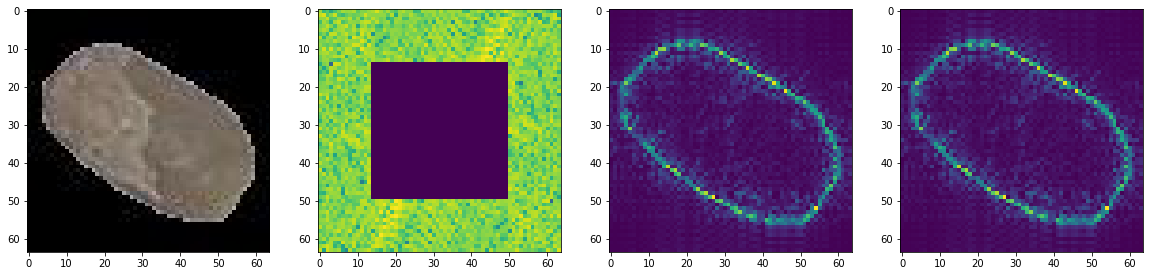

In [3]:
img = Image.open('../data/normal_data/normal_sec_processed_data/20200518_0_normal_take0_final.jpg')
img = np.array(img)
f = np.fft.fft2(img[:,:,2])
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

x = 18 
rows,cols = img.shape[:2]
crow,ccol = (int)(rows/2),(int)(cols/2)
fshift[crow-x:crow+x, ccol-x:ccol+x] = 0
magnitude_spectrum[crow-x:crow+x, ccol-x:ccol+x] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,4,1)
ax1.imshow(img)
ax2 = fig.add_subplot(1,4,2)
ax2.imshow(magnitude_spectrum)
ax3 = fig.add_subplot(1,4,3)
ax3.imshow(img_back)
ax4 = fig.add_subplot(1,4,4)
ax4.imshow(img_back)

# 테스트 해보고 싶은것
- 1. 데이터에서 윤곽선만 따서 윤곽선 데이터로 학습 시켜서 테스트 해보기
- 2. 윤곽선을 따서 차원 확장 => 중심으로부터 윤곽선까지의 거리 VS 시간 으로 함수 만들기


In [13]:
src = Image.open('../data/broken_data/broken_sec_processed_data/20200519_0_broken_take0_final.jpg')
src = np.array(src)
thres = 40
############################################################################
# <이미지 노이즈 및 배경 제거>

# 그레이 스케일로 변환
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)

# 바이너리로 변환
ret, binary = cv2.threshold(gray,thres,255, cv2.THRESH_BINARY)
binary = cv2.bitwise_not(binary)

height = src.shape[0]
width = src.shape[1]

############################################################################
# <생두 무게 중심 구하기>
R = list()
for y in range(height):
    for x in range(width):
        if binary[y,x]:            
            R.append([x, y])

# 질량의 합
M = len(R)

# 질량중심 벡터는 이미지를 기준으로 (x,y)
R = np.array(R)
R_x = R[:,0]
R_y = R[:,1]

R_x_sum = R_x.sum()
R_y_sum = R_y.sum()

center = np.round(R_x_sum/M).real , (np.round(R_y_sum/M)).real

height_center = center[1]
width_center = center[0]

print('center:', height_center, width_center)


############################################################################
# <객체 외부의 노이즈 데이터 처리하기>

# 바이너리의 윤곽선 추출
_, contours, hierachy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)    

# 생두 객체 윤곽과 윤곽벡터 구하기
contours_leng = [len(i) for i in contours if len(i) != 252]
# print('contours_leng: ', contours_leng)
max = np.array(contours_leng).max()
# print('max: ', max)
contour_vector_from_center = list()
contour_vector = list()
for i in contours:
    if len(i) == max:
        # print(i)
        for point in i:
            contour_vector.append((point[0][1], point[0][0]))
            contour_vector_from_center.append((point[0][1]-height_center, point[0][0]-width_center))
print('counts of contour vector: ', len(contour_vector))
print(contour_vector)
print(contour_vector_from_center)
        

center: 32.0 31.0
counts of contour vector:  98
[(16, 25), (15, 26), (15, 27), (15, 28), (15, 29), (15, 30), (15, 31), (15, 32), (15, 33), (15, 34), (15, 35), (16, 36), (16, 37), (16, 38), (17, 39), (17, 40), (17, 41), (18, 42), (18, 43), (19, 44), (20, 45), (21, 46), (22, 47), (23, 48), (24, 49), (25, 50), (26, 51), (27, 52), (28, 52), (29, 53), (30, 54), (31, 54), (32, 55), (33, 55), (34, 55), (35, 55), (36, 55), (37, 55), (38, 54), (39, 54), (40, 53), (41, 52), (42, 51), (42, 50), (42, 49), (43, 48), (43, 47), (44, 46), (44, 45), (44, 44), (44, 43), (45, 42), (45, 41), (46, 40), (47, 39), (48, 38), (48, 37), (48, 36), (49, 35), (49, 34), (49, 33), (49, 32), (48, 31), (48, 30), (47, 29), (47, 28), (46, 27), (45, 26), (45, 25), (44, 24), (43, 24), (42, 23), (41, 22), (40, 21), (39, 21), (38, 20), (37, 19), (36, 19), (35, 18), (34, 18), (33, 17), (32, 17), (31, 17), (30, 17), (29, 17), (28, 17), (27, 17), (26, 17), (25, 17), (24, 18), (23, 18), (22, 19), (21, 19), (20, 20), (19, 21), (

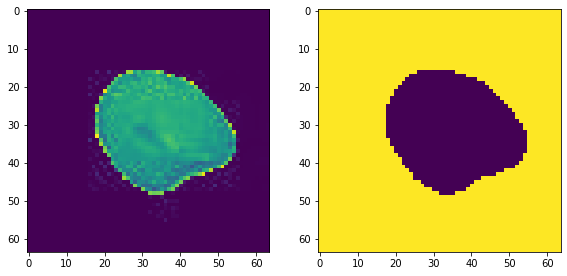

In [12]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,4,1)
ax1.imshow(gray)
ax2 = fig.add_subplot(1,4,2)
ax2.imshow(binary)
# ax3 = fig.add_subplot(1,4,3)
# ax3.imshow(img_back)
# ax4 = fig.add_subplot(1,4,4)
# ax4.imshow(img_back)

In [10]:
vectors = np.concatenate([np.array(contour_vector),np.array(contour_vector_from_center)], axis = 1)
vectors_size = np.sqrt(vectors[:,2]**2 + vectors[:,3]**2).reshape(vectors.shape[0],1)
final_array = np.concatenate([vectors, vectors_size], axis = 1)


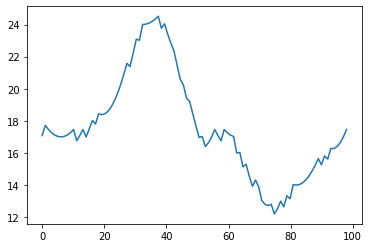

In [11]:
x = np.linspace(0, final_array.shape[0], final_array.shape[0])
plt.plot(x, final_array[:,4])

In [ ]:


x = symbols('x') #x를 기호변수화
fx = 4 * x ** 4 + 3 * x ** 3 +  2 * x ** 2 + x + 1

fprime = Derivative(fx, x).doit() #x에 대해서 미분
print("fx 의 도함수는 : ", fprime, "입니다")
n = fprime.subs({x: 3})
print("fx에서 x = 3 에서의 순간변화율(미분계수는) ", n , "입니다")


>>> fx 의 도함수는 :  16*x**3 + 9*x**2 + 4*x + 1 입니다
>>> fx에서 x = 3 에서의 순간변화율(미분계수는)  526 입니다